# Klasifikasi Kualitas Air Menggunakan Perbandingan Model Logistic Regression dan Random Forest

## Anggota Kelompok
- Ahmad Farhan QF – 1203230008
- Arif Widianto – 1203230051

# Laporan

[Link Laporan](https://docs.google.com/document/d/1biVTdHmwGVEfP4xi7j6t_i9JoIOEKk8N/edit?usp=sharing&ouid=101833211070421441163&rtpof=true&sd=true)

# Pendahuluan dan Paparan Data

## 1. Pendahuluan

Kualitas air merupakan faktor krusial dalam menjaga kesehatan manusia dan lingkungan. Air yang mengandung zat kimia berbahaya atau mikroorganisme patogen dapat menyebabkan berbagai penyakit serius apabila dikonsumsi secara terus-menerus. Oleh karena itu, diperlukan sistem otomatis yang mampu mengklasifikasikan kualitas air secara akurat berdasarkan parameter fisik, kimia, dan biologis.

Permasalahan yang ingin diselesaikan dalam penelitian ini adalah **bagaimana membangun model Machine Learning yang mampu mengklasifikasikan air menjadi layak konsumsi (safe) dan tidak layak konsumsi (not safe)** berdasarkan data kualitas air yang tersedia.

Penelitian ini bertujuan untuk membandingkan performa dua metode Machine Learning, yaitu **Random Forest Classifier** dan **Logistic Regression**, dalam melakukan klasifikasi kualitas air.


In [313]:
import pandas as pd
import numpy as np
import os

## 2. Paparan Dataset

Penelitian ini menggunakan dua dataset terbuka yang diperoleh dari platform Kaggle, yaitu:

### 2.1 Water Quality Dataset (mssmartypants/water-quality)

Dataset ini berisi parameter kualitas air berdasarkan kandungan zat kimia dan biologis. Seluruh atribut berupa variabel numerik, dengan label kelas `is_safe` yang menunjukkan apakah air layak konsumsi atau tidak.

Beberapa atribut utama pada dataset ini antara lain aluminium, arsenic, ammonia, chloramine, bacteria, dan viruses. Setiap atribut memiliki ambang batas keamanan tertentu yang menentukan tingkat bahaya air.

### 2.2 Water Potability Dataset (adityakadiwal/water-potability)

Dataset ini berisi 3.276 sampel kualitas air dengan parameter fisik dan kimia air minum seperti pH, hardness, total dissolved solids (TDS), chloramines, sulfate, conductivity, organic carbon, trihalomethanes, dan turbidity. Label kelas pada dataset ini adalah `potability`, di mana nilai 1 menunjukkan air layak konsumsi dan 0 menunjukkan tidak layak konsumsi.

Kedua dataset memiliki karakteristik yang saling melengkapi sehingga digabung untuk meningkatkan variasi dan cakupan data.


In [314]:
dataset_path = '../datasets'

df1 = pd.read_csv(os.path.join(dataset_path, 'waterQuality1.csv'))
df2 = pd.read_csv(os.path.join(dataset_path, 'water_potability.csv'))

df1.columns = df1.columns.str.lower().str.strip()
df2.columns = df2.columns.str.lower().str.strip()

df1.shape, df2.shape

((7999, 21), (3276, 10))

## 3. Statistik Deskriptif Dataset

Analisis statistik deskriptif dilakukan untuk memahami distribusi data, nilai minimum, maksimum, rata-rata, serta penyebaran setiap atribut pada dataset. Tahap ini membantu dalam mengidentifikasi potensi anomali dan kebutuhan pre-processing lebih lanjut.


In [315]:
display(df1.describe())
display(df2.describe())

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## 4. Pre-processing Dataset

Tahapan pre-processing dilakukan untuk memastikan data berada dalam format yang konsisten dan siap digunakan dalam proses pembelajaran Machine Learning.


### 4.1 Standarisasi Nama Atribut

Nama atribut pada kedua dataset diseragamkan dengan mengubah huruf menjadi lowercase, menghilangkan spasi, serta menyamakan nama atribut yang memiliki makna yang sama, seperti `chloramines` dan `chloramine`.


In [316]:
forced_map = {
    "chloramines": "chloramine",
    "chloramine": "chloramine",
    "flouride": "fluoride",
    "fluoride": "fluoride",
    "bacteriological": "bacteria",
    "bacteria": "bacteria",
    "virus": "viruses",
    "viruses": "viruses"
}

df1 = df1.rename(columns=forced_map)
df2 = df2.rename(columns=forced_map)


### 4.2 Penanganan Nilai Error dan Missing Value

Beberapa nilai pada dataset mengandung error seperti `#NUM!` dan `#DIV/0!`. Nilai-nilai tersebut digantikan dengan `NaN` dan kemudian ditangani agar tidak mempengaruhi proses pelatihan model.


In [317]:
excel_errors = ["#NUM!", "#DIV/0!", "#REF!", "#VALUE!", "#NAME?", "#NULL!", "#N/A"]

df1 = df1.replace(excel_errors, np.nan)
df2 = df2.replace(excel_errors, np.nan)

df1 = df1.apply(pd.to_numeric, errors="ignore")
df2 = df2.apply(pd.to_numeric, errors="ignore")


/var/folders/3h/t4lh339d4bd13g2xfbpgt0pm0000gn/T/ipykernel_69464/2865179598.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df1 = df1.apply(pd.to_numeric, errors="ignore")
/var/folders/3h/t4lh339d4bd13g2xfbpgt0pm0000gn/T/ipykernel_69464/2865179598.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df2 = df2.apply(pd.to_numeric, errors="ignore")


### 4.3 Standarisasi Label Kelas

Label `potability` pada Water Potability Dataset diubah menjadi `is_safe` agar konsisten dengan label pada Water Quality Dataset.


In [318]:
df2["is_safe"] = df2["potability"]
df2 = df2.drop(columns=["potability"])


### 4.4 Penggabungan Dataset

Kedua dataset digabungkan dengan membentuk gabungan seluruh fitur. Kolom yang tidak tersedia pada salah satu dataset diisi dengan nilai default 0. Pendekatan ini digunakan untuk menjaga konsistensi dimensi data.


In [319]:
all_cols = sorted(set(df1.columns).union(set(df2.columns)))

for col in all_cols:
    if col not in df1.columns:
        df1[col] = 0
    if col not in df2.columns:
        df2[col] = 0

df = pd.concat([df1[all_cols], df2[all_cols]], ignore_index=True)
df = df.fillna(0)

df.shape


(11275, 29)

In [320]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,11275.0,0.472603,1.107689,0.00,0.00,0.040,0.100000,5.050000
ammonia,11275.0,10.125816,9.897300,-0.08,0.00,8.090,18.910000,29.840000
arsenic,11275.0,0.114537,0.225024,0.00,0.00,0.030,0.080000,1.050000
bacteria,11275.0,0.226785,0.313178,0.00,0.00,0.000,0.450000,1.000000
barium,11275.0,1.112208,1.247320,0.00,0.00,0.650,1.910000,4.940000
cadmium,11275.0,0.030369,0.036051,0.00,0.00,0.010,0.060000,0.130000
chloramine,11275.0,3.613752,3.231834,0.00,0.21,3.440,6.590000,13.127000
chromium,11275.0,0.175393,0.254091,0.00,0.00,0.050,0.260000,0.900000
conductivity,11275.0,123.835738,198.355991,0.00,0.00,0.000,337.134216,753.342620
copper,11275.0,0.571712,0.660968,0.00,0.00,0.170,1.140000,2.000000


## 5. Mekanisme Pembagian Data

Dataset dibagi menjadi data training dan testing dengan rasio 80% untuk training dan 20% untuk testing. Pembagian dilakukan secara stratified sampling untuk menjaga proporsi kelas tetap seimbang.


In [321]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["is_safe"])
y = df["is_safe"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# Metode dan Eksperimen

## 6. Metode yang Digunakan

Penelitian ini menggunakan dua metode Machine Learning, yaitu Random Forest Classifier dan Logistic Regression. Kedua metode dipilih untuk membandingkan model berbasis ensemble dan model linear dalam menangani klasifikasi kualitas air.


In [322]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


## 7. Metrik Evaluasi dan Hyperparameter

Evaluasi kinerja model dilakukan menggunakan beberapa metrik, yaitu accuracy, precision, recall, F1-score, confusion matrix, serta ROC-AUC. Penggunaan beberapa metrik bertujuan untuk memperoleh evaluasi yang lebih komprehensif.

Hyperparameter dipilih berdasarkan eksperimen awal untuk memperoleh performa yang stabil.


In [323]:
param_space = {
    "n_estimators": Integer(100, 300),
    "max_depth": Categorical([None, 10, 20]),
    "min_samples_split": Integer(2, 10)
}

bayes_search = BayesSearchCV(
    RandomForestClassifier(
        class_weight="balanced",
        random_state=42
    ),
    search_spaces=param_space,
    n_iter=15,            # number of Bayesian steps
    scoring="f1",
    cv=3,
    n_jobs=-1,
    random_state=42
)

In [324]:
logreg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(
        class_weight="balanced",
        max_iter=20000
    ))
])

param_space_lr = {
    "lr__C": Real(1e-2, 10, prior="log-uniform"),
    "lr__solver": Categorical(["lbfgs", "liblinear"])
}

bayes_lr = BayesSearchCV(
    logreg_pipeline,
    search_spaces=param_space_lr,
    n_iter=15,
    scoring="f1",
    cv=3,
    n_jobs=-1,
    random_state=42
)

### Optimization (Hyperparameter Tuning)

In [325]:
# Random Forest with Bayesian Optimization Fit and Predict
bayes_search.fit(X_train, y_train)
rf = bayes_search.best_estimator_
rf_pred = rf.predict(X_test)
bayes_search.fit(X_train, y_train)
print("Best RF params:", bayes_search.best_params_)

# Logistic Regression with Bayesian Optimization Fit and Predict
bayes_lr.fit(X_train, y_train)
logreg = bayes_lr.best_estimator_
log_pred = logreg.predict(X_test)
print("Best LR params:", bayes_lr.best_params_)

Best RF params: OrderedDict([('max_depth', 10), ('min_samples_split', 9), ('n_estimators', 121)])
Best LR params: OrderedDict([('lr__C', 0.7099668574083867), ('lr__solver', 'liblinear')])


##### RF Notes
- `n_estimators = 121` -> The Random Forest uses 121 decision trees, the value 121 it's determined by the Bayesian optimizations after doing a search explores on any value in between [100, 300].
- `max_depth = 10` -> Each tree can grow up to 10 levels deep.
- `min_samples_split = 9` -> A node will only split if it has at least 9 samples.
- Out of all parameter combinations you allowed, the tuner tested them using cross-validation and this combination produced the best F1-score.
- The optimal Random Forest configuration uses a moderate number of trees with limited depth and minimum split size, indicating that controlling model complexity improves F1-score on imbalanced water quality data.


##### LR Notes
- `lr__C ≈ 0.71` -> Regularization strength is default.
  - Smaller C → stronger regularization
  - Larger C → weaker regularization
  - C < 1 → slightly stronger regularization than default

- `lr__solver = 'liblinear'` -> Optimization algorithm used to fit the model. `liblinear` handles binary classification + class imbalance well.
- LR recall was already high
- Tuning didn’t dramatically change performance
- Logistic Regression achieved its best F1-score with standard regularization strength and a stable solver.
- Logistic Regression is already near its optimal configuration for this dataset.


Key Points: 
- Hyperparameter tuning indicates that Random Forest benefits significantly from controlled model complexity, while Logistic Regression performs optimally with default regularization, reflecting the linear separability of the data.
- Bayesian optimization identified non-integer and non-grid-aligned hyperparameter values, such as 121 estimators and a regularization strength of 0.71, indicating that fine-grained tuning improves F1-score beyond coarse grid or random search.

# Hasil dan Analisis

## 8. Hasil Training dan Validasi

Berdasarkan hasil pelatihan model, Random Forest menunjukkan kemampuan yang lebih baik dalam menangkap pola non-linear pada data kualitas air dibandingkan Logistic Regression.


In [326]:
from sklearn.metrics import accuracy_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


Random Forest Accuracy: 0.788470066518847
              precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      1817
         1.0       0.48      0.89      0.62       438

    accuracy                           0.79      2255
   macro avg       0.72      0.83      0.74      2255
weighted avg       0.87      0.79      0.81      2255

Logistic Regression Accuracy: 0.730820399113082
              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81      1817
         1.0       0.41      0.85      0.55       438

    accuracy                           0.73      2255
   macro avg       0.68      0.78      0.68      2255
weighted avg       0.85      0.73      0.76      2255



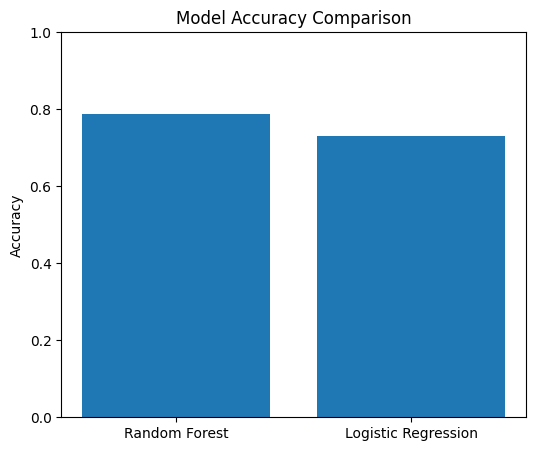

In [327]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

rf_acc = accuracy_score(y_test, rf_pred)
logreg_acc = accuracy_score(y_test, log_pred)

plt.figure(figsize=(6, 5))
plt.bar(
    ["Random Forest", "Logistic Regression"],
    [rf_acc, logreg_acc]
)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

## 9. Hasil Testing

Pengujian dilakukan menggunakan data testing yang belum pernah dilihat sebelumnya. Hasil evaluasi menunjukkan bahwa Random Forest memiliki tingkat kesalahan klasifikasi yang lebih rendah dibandingkan Logistic Regression.


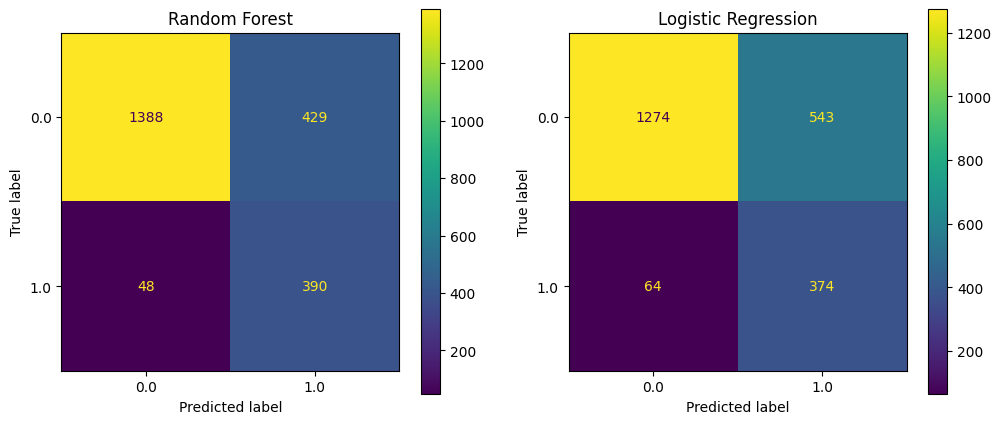

In [328]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, ax=ax[0])
ax[0].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_test, log_pred, ax=ax[1])
ax[1].set_title("Logistic Regression")

plt.show()


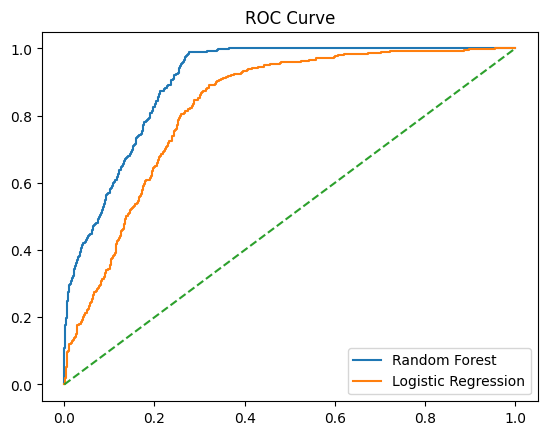

In [329]:
rf_prob = rf.predict_proba(X_test)[:,1]
log_prob = logreg.predict_proba(X_test)[:,1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)

plt.plot(rf_fpr, rf_tpr, label="Random Forest")
plt.plot(log_fpr, log_tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve")
plt.show()


### Feature Importance

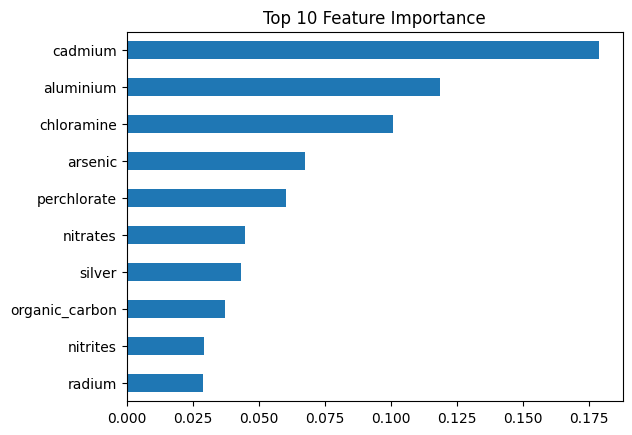

In [330]:
importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10).plot(
    kind="barh",
    title="Top 10 Feature Importance"
)
plt.gca().invert_yaxis()
plt.show()

# Kesimpulan

Berdasarkan seluruh eksperimen yang telah dilakukan, dapat disimpulkan bahwa **Random Forest Classifier merupakan metode terbaik** dalam klasifikasi kualitas air pada penelitian ini. Model ini menunjukkan performa tertinggi berdasarkan metrik accuracy dan ROC-AUC.

Penggabungan dua dataset dengan karakteristik yang berbeda berhasil meningkatkan variasi data dan membantu model dalam melakukan generalisasi.
